### data visualization
--------------
변경사항
- 1) current_date
- 2) outcome_name ; 변경하면서 다시 재실행 
--------------

3013721 # temp.dbo.person_AST	; AST\
3006923 # temp.dbo.person_ALT	; ALT\
3035995 # temp.dbo.person_ALP	; ALP\
3022217 # temp.dbo.person_PT	; PT[INR] (Prothrombin Time)]\
3024128 # temp.dbo.person_TB	; Total bilirubin\
3016723 # temp.dbo.person_CR	; Creatinine

In [3]:
current_date = 20220317
outcome_name = "AST"

In [39]:
import os
import pathlib
import sys
sys.path.append("..")

current_dir = pathlib.Path.cwd()
parent_dir = current_dir.parent
output_data_dir = pathlib.Path('{}/data/{}/visualization/'.format(parent_dir, current_date))
pathlib.Path.mkdir(output_data_dir, mode=0o777, parents=True, exist_ok=True)
output_result_dir = pathlib.Path('{}/result/{}/visualization/{}/'.format(parent_dir, current_date, outcome_name))
pathlib.Path.mkdir(output_result_dir, mode=0o777, parents=True, exist_ok=True)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install pymssql
import pymssql

pd.set_option('display.max_colwidth', -1)  #각 컬럼 width 최대로 
pd.set_option('display.max_rows', 50)      # display 50개 까지 

C:\Users\suncheolheo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


# connection DataBase (해당 DB의 명령문 사용)

### Postgresql (계정유출 주의)

In [70]:
# import pandas.io.sql as psql
# import psycogp2 as pg
# conn = pg.connect(host='111.1.11.11', dbname='cdm', user='1111', password='1111', port='5432')
# print('connection')

# sql = 'select * from cdm.cdm.person'
# population = psql.read(sql=sql1, con=conn)
# population.to_csv('population.txt', index=False)

### Mssql (계정유출 주의)

In [5]:
import pymssql
#conn= pymssql.connect(server="111.111.111.111", user="user", password="password", port=22, database='db', as_dict=False)
conn= pymssql.connect(server="61.252.54.76", user="atlas", password="dhlab2021!", port=14333, database='CDM', as_dict=False)
print("connection")

connection


- Table Load from DB and Save dataset

In [6]:
tnPopulation = 'temp.dbo.person_{}'.format(outcome_name)
sqlq0 = 'select * from {}'.format(tnPopulation)
population_df = pd.read_sql(sql=sqlq0, con=conn)
population_df.to_csv('{}/person_{}.txt'.format(output_data_dir, outcome_name),index=False)
conn.close()

- load dataset

In [81]:
population_df=pd.read_csv('{}/person_{}.txt'.format(output_data_dir, outcome_name))
population_df['age_dec'] = population_df.age.map(lambda age: 10 * (age // 10))
outlier = population_df.query('age>120 or age <=0')
population_df.drop(outlier.index, inplace=True)
print(len(outlier))
#population_df.plot(kind='scatter',x='age',y='value_as_number')

0


In [82]:
def save_JointPlot(df, filedir, filename):
    joint_plot = sns.jointplot(x="age", y="value_as_number", data=df, kind="kde", hue="gender_source_value", markers=["M", "F"])
    plt.suptitle(t="{}(age-value) plot".format(outcome_name), y=1.02)
    plt.xlabel(xlabel="age")
    plt.ylabel(ylabel="lab value")
    joint_plot.savefig('{}/{}_plot1.png'.format(filedir, filename), dpi=300)
    plt.show()
    
def save_quadplot(df, filedir, filename):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)

    #1 
    plot1 = axes[0,0]
    sns.countplot(ax=plot1, data=df, x="gender_source_value")
    plot1.set_title("count by gender")
    plot1.set_xlabel(xlabel="gender")
    plot1.set_ylabel(ylabel="count (n)")
    plot1.grid(True, lw = 0.5)

    #2
    plot2 = axes[0,1]
    sns.histplot(ax=plot2, data=df, x="value_as_number")
    plot2.set_title("count by value")
    plot2.set_xlabel(xlabel="value")
    plot2.set_ylabel(ylabel="count (n)")
    plot2.legend(loc='upper right')

    #2
    plot3 = axes[1,0]
    sns.lineplot(ax=plot3, x='age_dec', y="person_id",data=df[df['gender_source_value']=='M'].groupby(['age_dec']).count(), marker='o', alpha=0.6, label='M')
    sns.lineplot(ax=plot3, x='age_dec', y="person_id",data=df[df['gender_source_value']=='F'].groupby(['age_dec']).count(), marker='o', alpha=0.6, label='F')
    sns.lineplot(ax=plot3, x='age_dec', y="person_id", data=df.groupby(['age_dec']).count(), marker='o', label='ALL')
    plot3.set_title("count by age")
    plot3.set_xlabel(xlabel="age")
    plot3.set_ylabel(ylabel="count (n)")
    plot3.grid(True, lw = 0.5)#그래프 보조선을 그음, lw - 선의 굵기 설정

    #3
    plot4 = axes[1,1]
    ax = sns.boxplot(ax=plot4, x="age_dec", y="value_as_number", data=df, hue="gender_source_value") #, palette="Set3"
    plot4.set_title("value by age and gender")
    plot4.set_xlabel(xlabel="age")
    plot4.set_ylabel(ylabel="value")
    plot4.legend(loc='upper right')

    fig.savefig('{}/{}_plot2.png'.format(filedir, filename), dpi=300)


D:\Utility\Python37\lib\site-packages\seaborn\distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'markers'
  **contour_kws,


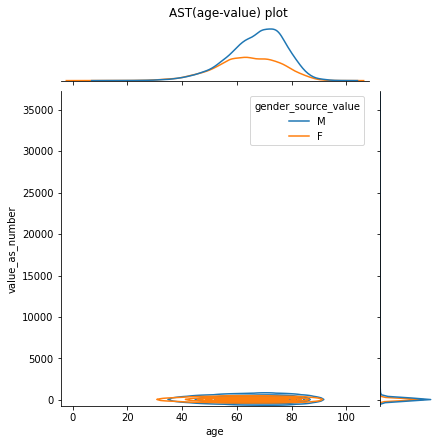

In [83]:
save_JointPlot(df=population_df, filedir=output_result_dir, filename=outcome_name)

No handles with labels found to put in legend.


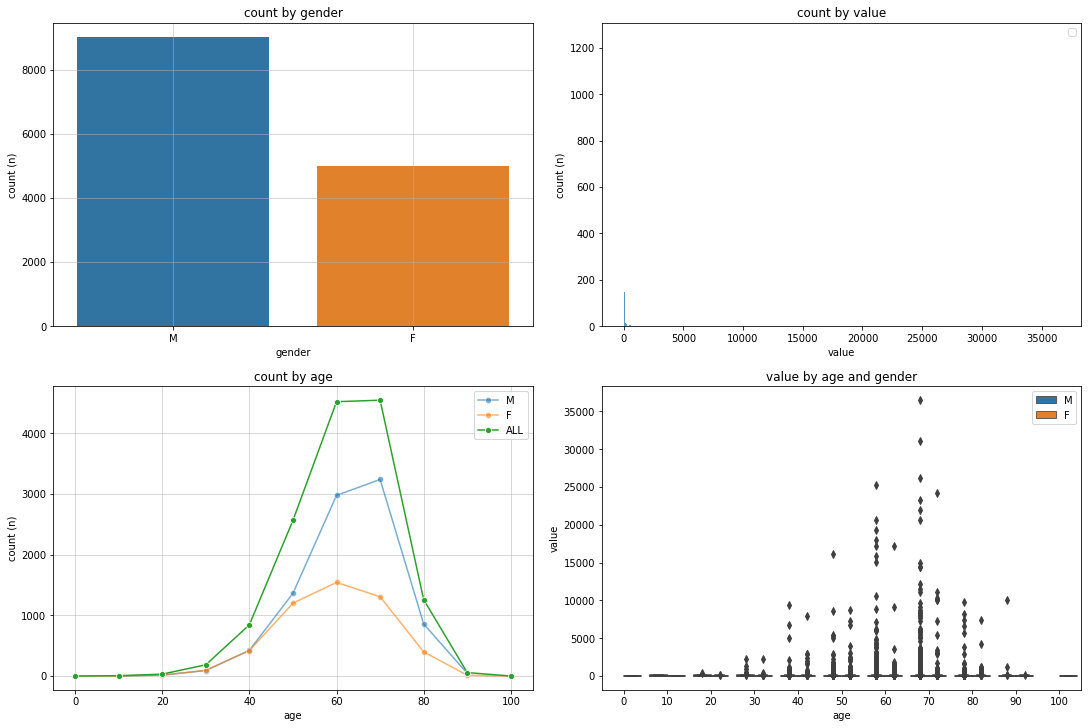

In [84]:
save_quadplot(df=population_df, filedir=output_result_dir, filename=outcome_name)
    

In [85]:
q1=population_df['value_as_number'].quantile(0.25)
q3=population_df['value_as_number'].quantile(0.75)
iqr=q3-q1
outlier = population_df[population_df['value_as_number']>q3+3*iqr].index
population_df.drop(outlier, inplace=True)
print(len(outlier))
outlier = population_df[population_df['value_as_number']<q1-3*iqr].index
population_df.drop(outlier, inplace=True)
print(len(outlier))

1063
0


D:\Utility\Python37\lib\site-packages\seaborn\distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'markers'
  **contour_kws,


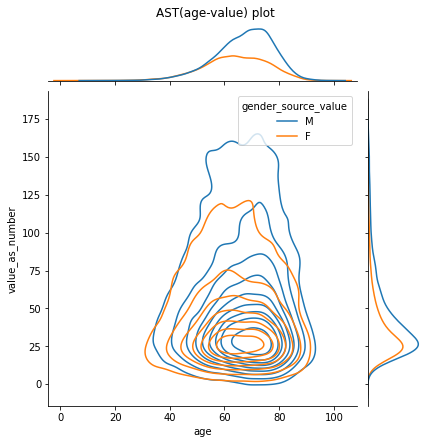

In [86]:
save_JointPlot(df=population_df, filedir=output_result_dir, filename=outcome_name+"(IQR)")

No handles with labels found to put in legend.


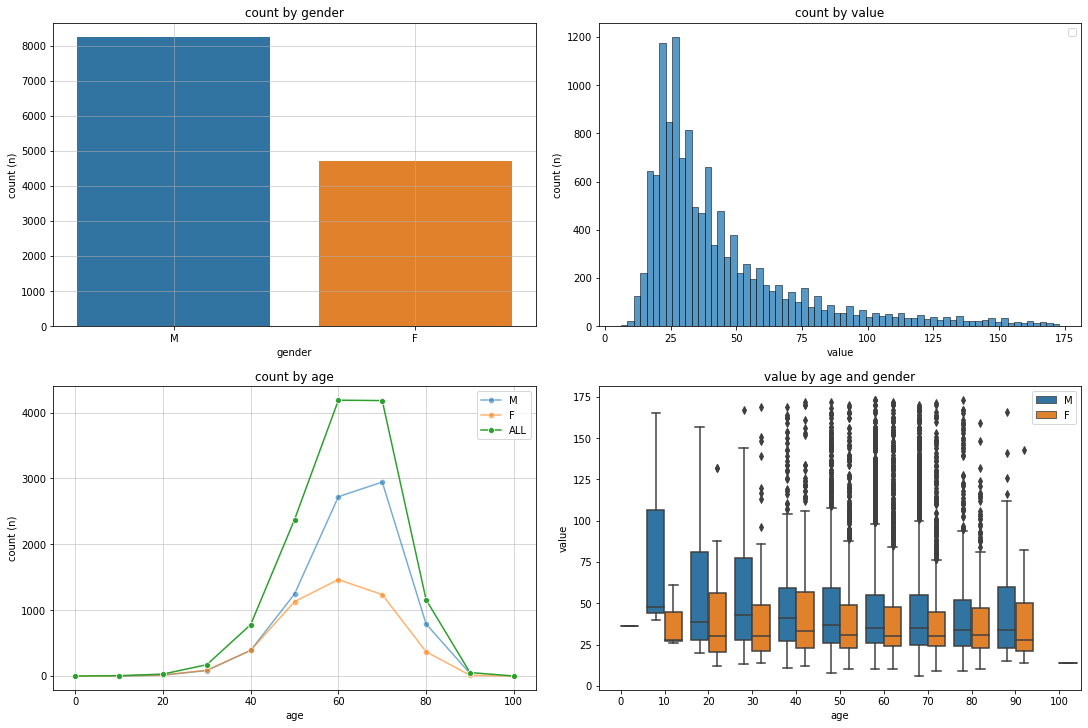

In [87]:
save_quadplot(df=population_df, filedir=output_result_dir, filename=outcome_name+"(IQR)")